## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

### 1.
Regression relates to numerical variables where we are looking to predict a numerical outcome, such as height or weight. Classification relates to categorical variables and how we can predict the categorical outcome (car brand, movie genre). Both can be predicted using the kNN algorithm. 

### 2.
A confusion table is a cross-tabulation of predicted and actual values. We use it to guage a model's performance and accuracy by computing the proportion of predicted values that were correct, with respect to the total number of observations.

### 3.
The sum of squared error, or SSE, quantifies how far off the predicted values are from their true values for a given model. In doing so, we have a rougher sense of the fit of our model and can explore adjustments to reduce this quantified error. As the name entails, the SSE is simply the difference between the true and predicted value squared, then summed for each observation.

### 4.
Overfitting and underfitting refer to our hyperparameter k, which represents the number of neighbors we want to look at when predicting our values. Because we are trying to explain a phenonmenon in our data and generalize it for incoming data, we need to fit our model appropriately, which requires an effective k value. Underfitting refers to our model being too imprecise with its predictions to derive any meaning from them, typically due to k being too high. With too many neighbors being averaged, all predicted values tend to move towards the dataset average. On the other hand, overfitting occurs when k is too low and unrealistically precise. The model overpredicts tiny nuances in the data that may be unique to this specific dataset, resulting in poor predictions for any incoming data.

### 5.
Splitting the data and choosing k by evaluating accuracy/SSE on the test set is effective because it allows us to generalize our data and simulate new, incoming data like in the real world. When we pick our hyperparameters solely on training data, we run the risk of overfitting on this specific data. Instead, we can reserve a subset of our data for testing and performance and train our model like normal. Once ready, we can select our k* from a range of reasonable k values, plotting each of their SSE/accuracy against one another to single out the k value with the highest accuracy. After we determine our k*, we know that it is optimal for our model and minimizes the risk of over/underfitting, improving our model performance.

### 6.
Reporting class labels simply involves labeling what category the model most likely predicts. This technique is strong because it is relatively easy to implement and visually analyze. It also works well for boolean, true/false labels that are more deterministic. At the same time, its output can be "blocky" in that we don't have a measure of confidence like we would for a probability distribution. For probability distributions, we list out the probabilities for each class, which gives us a measure of confidence. This opens the gateway to more advanced metrics/techniques, but also runs the risk of alienating results to viewers due to its relative complexity. Both have their strengths and weaknesses but require context and specific use cases.


**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

### 1. 
There are no NA values for price, year, or mileage.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("./data/USA_cars_datasets.csv")

df_cars = df_cars[["price", "year", "mileage"]]

print("df dimensions: ", df_cars.shape)
print("price NA count: ", df_cars["price"].isna().sum())
print("year NA count: ", df_cars["year"].isna().sum())
print("mileage NA count: ", df_cars["mileage"].isna().sum())

df_cars.head()

df dimensions:  (2499, 3)
price NA count:  0
year NA count:  0
mileage NA count:  0


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


### 2.

In [76]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

df_cars["year"] = maxmin(df_cars["year"])
df_cars["mileage"] = maxmin(df_cars["mileage"])

### 3.

In [77]:
X = df_cars[["year", "mileage"]]
y = df_cars["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=65)

### 4. 
When we create a scatterplot of the predicted and actual price against one another for each k value, the first pattern that stands out is the decrease in range of predicted values as k increases. At the same time, as k becomes too large, in the hundreds, the predicted values form horizontal clusters around specific ranges rather than form a linear relationship with the actual values.

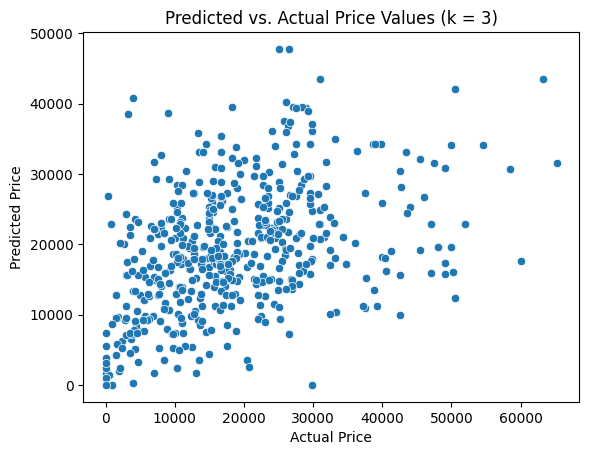

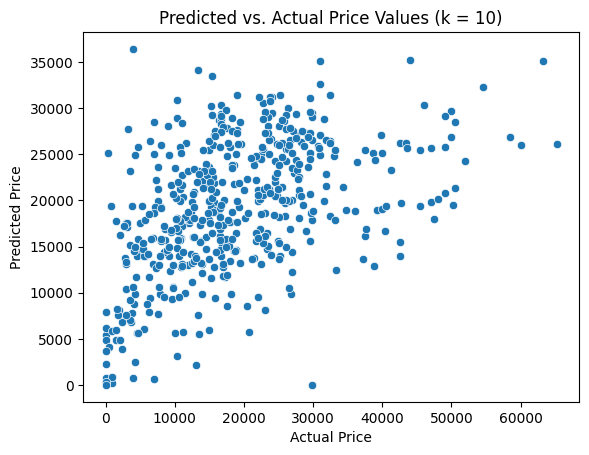

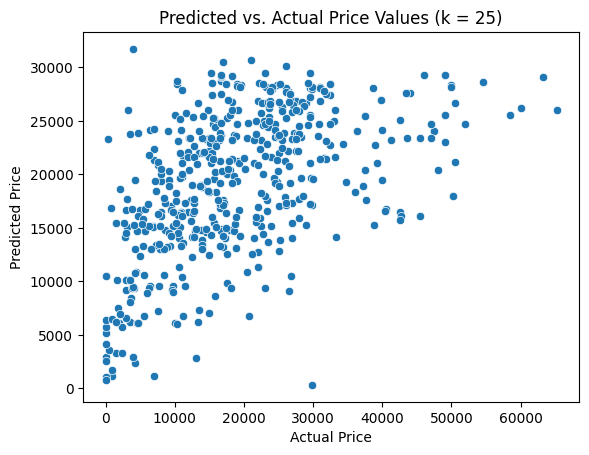

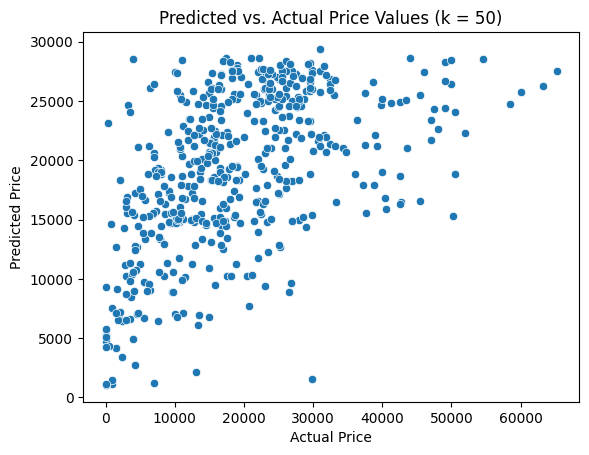

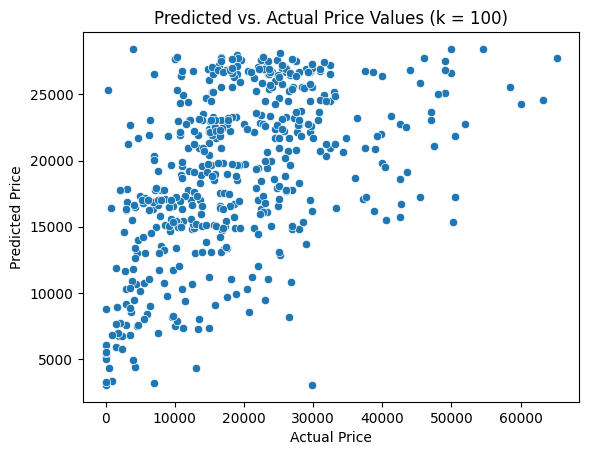

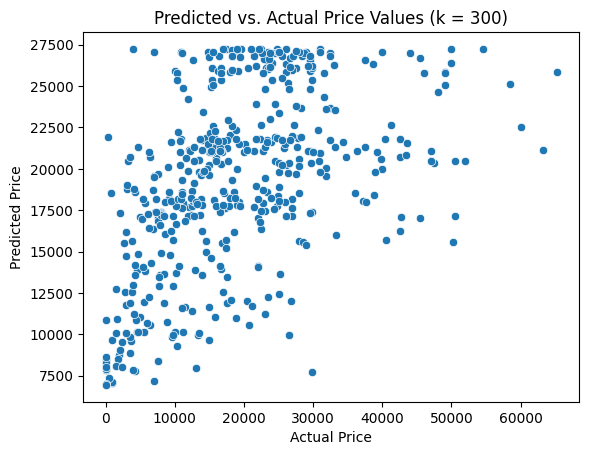

In [78]:
k_vals = [3,10,25,50,100,300]
MSE = []

for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    MSE.append(np.mean( (y_test-y_hat)**2 ))
    fig = sns.scatterplot(x=y_test, y=y_hat)
    fig.set(title=f'Predicted vs. Actual Price Values (k = {k})',
    xlabel='Actual Price', 
    ylabel='Predicted Price')
    plt.show()

### 5.
We can create a new dataframe using these data to illustrate the relationship between varying k values and our mean squared error. To find our optimal k, k*, we select the value that minimizes MSE. In the lineplot below, we can see that MSE is minimized when k = 50, with a value of 1.038671e+08. While this is a high MSE in general, it remains the lowest with respect to other possible k values. To be more granular, we can repeat the same process for k_bar, a range of possible k values from 1-50. For each value, we plot its MSE and find our k value that minimizes MSE, which is 28. In other words, of the original k values provided, 50 seemed to be the most optimal. But when we check each possible k value leading up to 50, we find that k* = 28 is the actual most optimal hyperparameter.

     k  Mean Squared Error
0    3        1.334880e+08
1   10        1.116431e+08
2   25        1.049462e+08
3   50        1.038671e+08
4  100        1.045346e+08
5  300        1.076565e+08


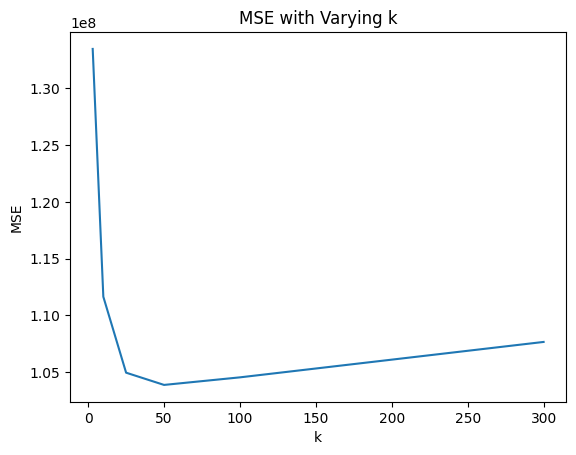

k*:  [28]


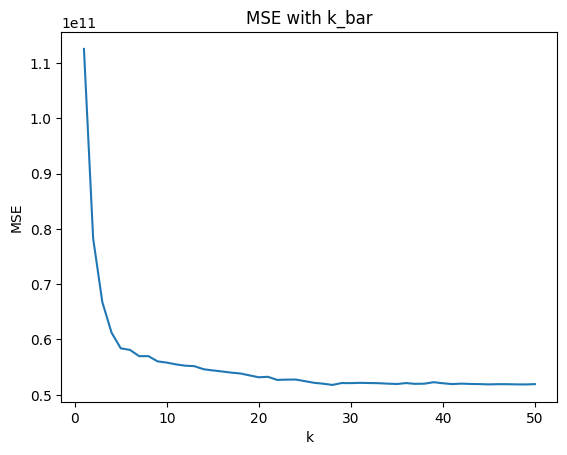

In [79]:
data = {"k": k_vals, "Mean Squared Error": MSE}
k_to_MSE = pd.DataFrame(data)

print(k_to_MSE)

fig = sns.lineplot(data=k_to_MSE, x="k", y="Mean Squared Error")
fig.set(title=f'MSE with Varying k',
xlabel='k', 
ylabel='MSE')
plt.show()


# plot MSE for first 50 values of k
k_bar = 50
optimal_MSE = [] 

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    optimal_MSE.append(np.sum( (y_test-y_hat)**2 ))

MSE_min = np.min(optimal_MSE)
min_index = np.where(optimal_MSE==MSE_min)
k_star = min_index[0]+1
print("k*: ", k_star)

data = {"k": np.arange(1,k_bar+1), "Mean Squared Error": optimal_MSE}
optimal_k_to_MSE = pd.DataFrame(data)

fig = sns.lineplot(data=optimal_k_to_MSE, x="k", y="Mean Squared Error")
fig.set(title=f'MSE with k_bar',
xlabel='k', 
ylabel='MSE')
plt.show()

### 6.
In the scatterplots of predicted vs. actual prices for varying k values, our initial k values were too small and subject to **overfitting**. This meant predictions were hyperreactive to slight patterns in the data and prone to higher variance/inconsistent values. This can be seen be the high range of predicted prices ranging from 0 to ~50,000. As k increased towards the optimal hyperparameter (k = 10, k = 25), we can see a better fit of our model. The range of predicted values become more consistent, and the scatterplot forms a tighter linear relationship between predicted vs. actual values, where a linear relationship suggests that the predicted values are 1:1 with the actual values. However, as we continue to increase k past the optimal value (k = 50, k = 100, k = 300), we begin to **underfit** our model. When we choose more and more neighbors to average for predictions, we lose sight of local patterns and begin to approximate the overall average, making the behavior of our model too smooth. This is best exemplified in k = 300, where 3 horizontal clusters of data points begin to form, all of which seem to hover around the same predicted price for an even smaller range of predictions, irrespective of the actual price.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.